In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
test = pd.read_csv('extract_test_Jul08.csv')
test = test.drop(['index'], axis = 1)
test = test.drop(test.columns[0],axis = 1)

In [3]:
scaler=StandardScaler() #instantiate
scaler.fit(test) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(test)

In [38]:
#print("After scaling minimum \n", X_scaled.min(axis=0))
#print("After scaling maximum \n", X_scaled.max(axis=0))

In [39]:
#print("After scaling average: \n", X_scaled.mean(axis=0))
#print("After scaling standar derivation: \n", X_scaled.std(axis=0))

In [40]:
pca=PCA() 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)

#let's check the shape of X_pca array
#print("shape of X_pca", X_pca.shape)

In [42]:
#pca.explained_variance_ratio_

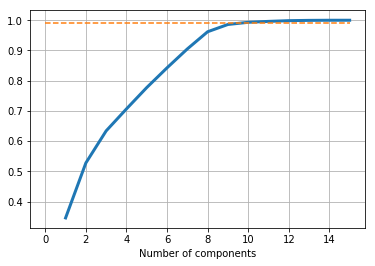

In [33]:
plt.plot(np.arange(1,16),np.cumsum(pca.explained_variance_ratio_), linewidth=3)
plt.xlabel('Number of components')
plt.grid()
plt.plot([0.99]*16, '--')

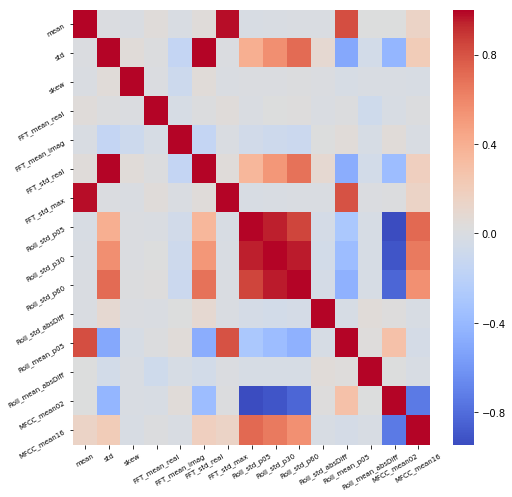

In [37]:
features = test.columns
import seaborn as sns

plt.figure(figsize=(8,8))
s=sns.heatmap(test.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()

In [15]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio*100)  

[54.54751773 28.71438548 16.73809678]


[-0.04612652  0.3227415   0.0130744   0.00954337 -0.05441917  0.30603722
 -0.04419793  0.3932463   0.4185007   0.42225894 -0.00140453 -0.23018035
 -0.0200048  -0.3895715   0.285719  ]


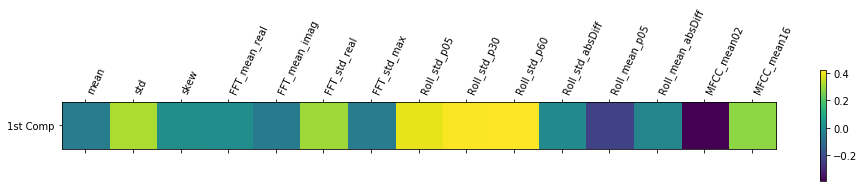

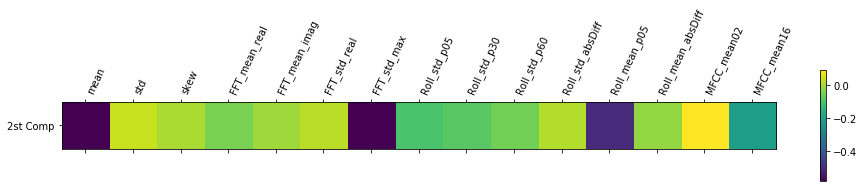

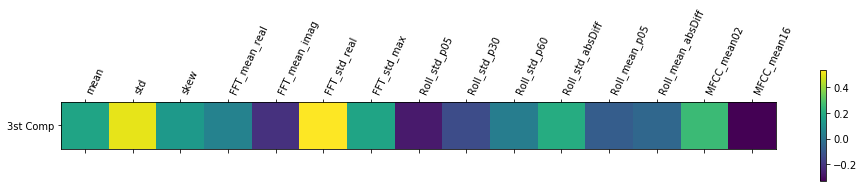

In [13]:
#plt.matshow(pca.components_,cmap='viridis')
print(pca.components_[0])
plt.matshow([pca.components_[0]],cmap='viridis')
plt.yticks([0],['1st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(test.columns)),test.columns,rotation=65,ha='left')
plt.show()

plt.matshow([pca.components_[1]],cmap='viridis')
plt.yticks([0],['2st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(test.columns)),test.columns,rotation=65,ha='left')
plt.show()#

plt.matshow([pca.components_[2]],cmap='viridis')
plt.yticks([0],['3st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(test.columns)),test.columns,rotation=65,ha='left')
plt.show()#